### **Packages Necessários**

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,precision_score, recall_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
import itertools



### **Carregamento dos Dados**


In [5]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path1 = '/content/drive/My Drive/Colab Notebooks/train_values.csv'
file_path2 = '/content/drive/My Drive/Colab Notebooks/train_labels.csv'
file_path3 = '/content/drive/My Drive/Colab Notebooks/test_values.csv'

train_values = pd.read_csv(file_path1, sep=';')
train_labels = pd.read_csv(file_path2, sep=';')
test_values = pd.read_csv(file_path3, sep=';')

data = pd.merge(train_values, train_labels)

patient_id = data['patient_id'].copy()
data = data.drop(['patient_id'], axis = 1)
train = train_values.drop(['patient_id'], axis = 1)
y = train_labels.drop(['patient_id'], axis = 1)

patient_id_test = test_values['patient_id'].copy()
test_data = test_values.drop(['patient_id'], axis = 1)

Mounted at /content/drive


### **Caracterização do Dataset de Treino**

In [ ]:
data.shape #dimensões

(180, 14)

In [ ]:
print(data.info())  #informações sobre os tipos de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

**Presença de Doença Cardíaca VS Idade**

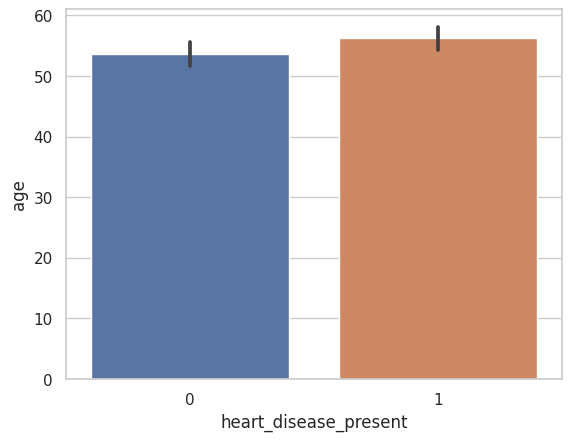

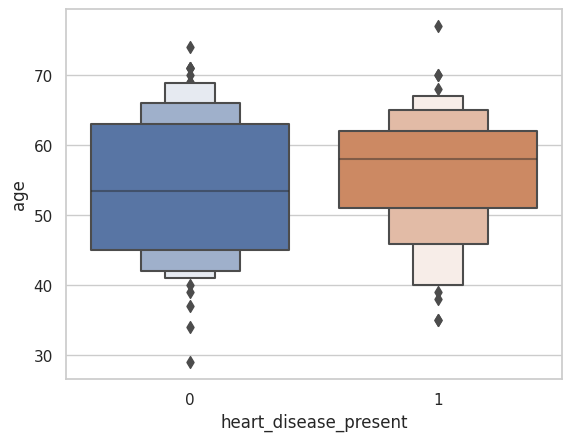

<ipython-input-44-482b63b721ef>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.age[data.heart_disease_present == 0], shade = True)
<ipython-input-44-482b63b721ef>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.age[data.heart_disease_present == 1], shade = True, color = "r")


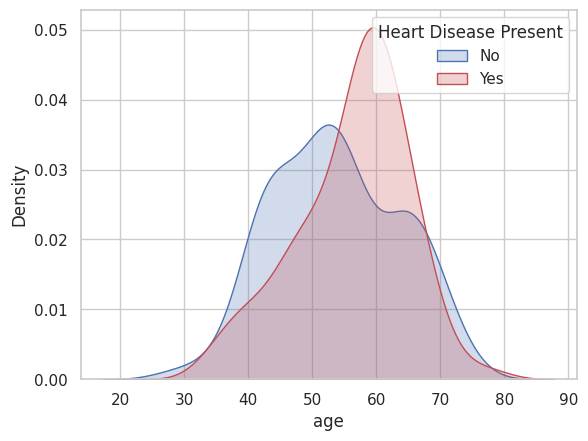

In [ ]:
sns.barplot(x = y.heart_disease_present, y = train.age)
plt.show()
sns.boxenplot(x = y.heart_disease_present, y = train.age)
plt.show()

sns.kdeplot(data.age[data.heart_disease_present == 0], shade = True)
sns.kdeplot(data.age[data.heart_disease_present == 1], shade = True, color = "r")
plt.legend(title = 'Heart Disease Present', labels = ['No', "Yes"])

**Presença de Doença Cardíaca VS Sexo**

<Axes: xlabel='heart_disease_present', ylabel='count'>

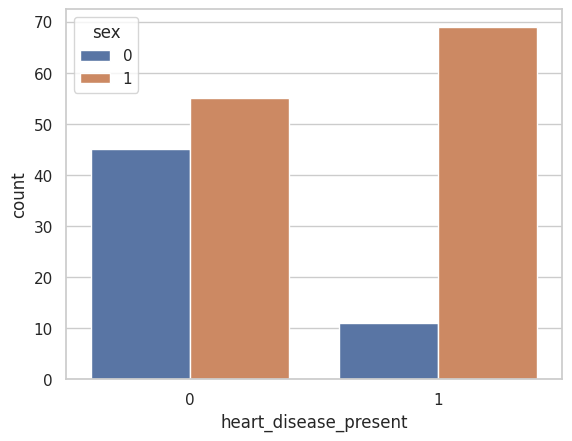

In [ ]:
data.groupby("heart_disease_present")['sex'].value_counts()

sns.countplot(x = "heart_disease_present", data = data, hue = "sex")


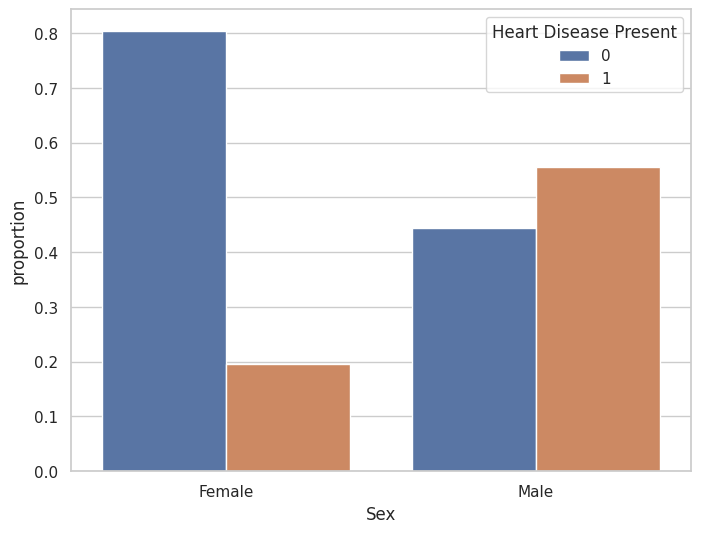

In [ ]:
hd_sex = data[['sex', 'heart_disease_present']]
hd_vs_sex = pd.crosstab(hd_sex.sex, hd_sex.heart_disease_present)

hd_vs_sex_norm = pd.crosstab(hd_sex.sex, hd_sex.heart_disease_present,
                       normalize = 'index')
hd_vs_sex_norm


hd_vs_sex_norm = hd_vs_sex_norm.reset_index()
hd_vs_sex_norm_spread = pd.melt(hd_vs_sex_norm, id_vars = 'sex', var_name = 'heart_disease_present', value_name = 'proportion')
hd_vs_sex_norm_spread['sex'].replace(0, "Female", inplace = True)
hd_vs_sex_norm_spread['sex'].replace(1, "Male", inplace = True)

plt.figure(figsize = (8,6))
g = sns.barplot(x = 'sex', y = 'proportion', data = hd_vs_sex_norm_spread, hue = "heart_disease_present")
plt.xlabel("Sex")
plt.legend(title = "Heart Disease Present")
plt.show(g);

**Presença de Doenla Cardíaca VS Frequência Cardíaca Máxima**

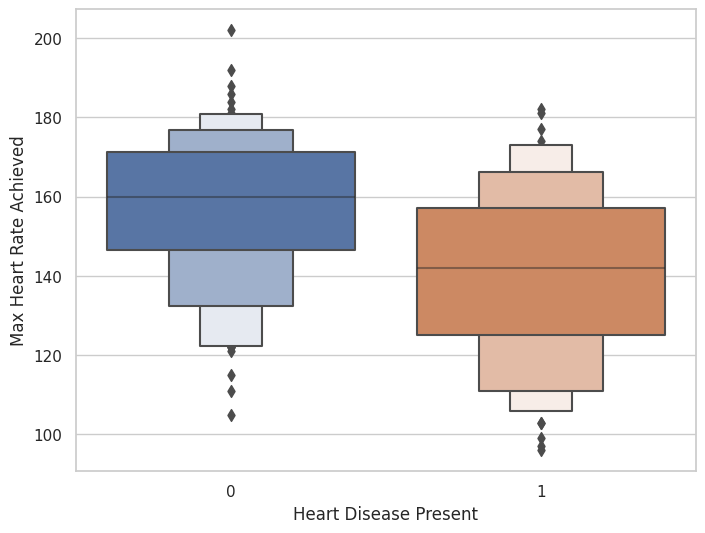

<ipython-input-47-eb26c380b6af>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 0], shade = True, legend = True)
<ipython-input-47-eb26c380b6af>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 1], shade = True, color = "r", legend = True)


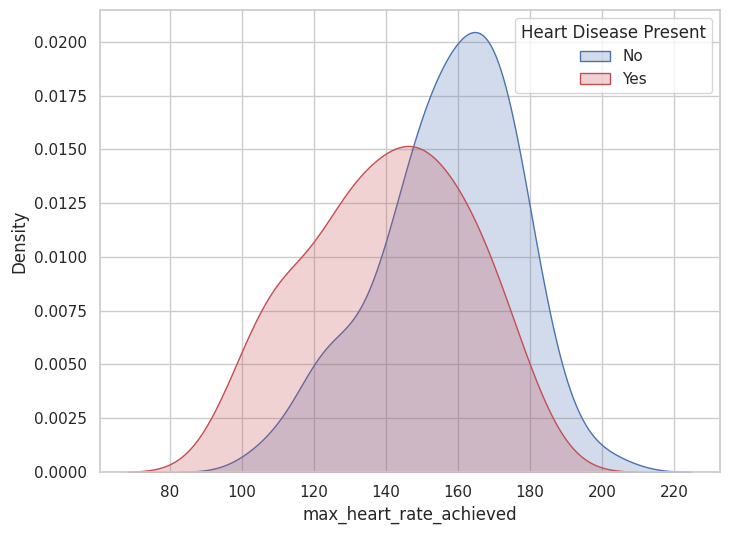

In [ ]:
#boxplot of max HR grouped by prescence of heart disease
plt.figure(figsize = (8,6))
sns.boxenplot(x = data.heart_disease_present, y = data.max_heart_rate_achieved)
plt.xlabel("Heart Disease Present")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

#kernel density estimate plot
plt.figure(figsize = (8,6))
sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 0], shade = True, legend = True)
sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 1], shade = True, color = "r", legend = True)
plt.legend(title = "Heart Disease Present", labels = ["No", "Yes"])
plt.show()

**Presença de Doença Cardíaca VS Tipo de Dor no Peito**

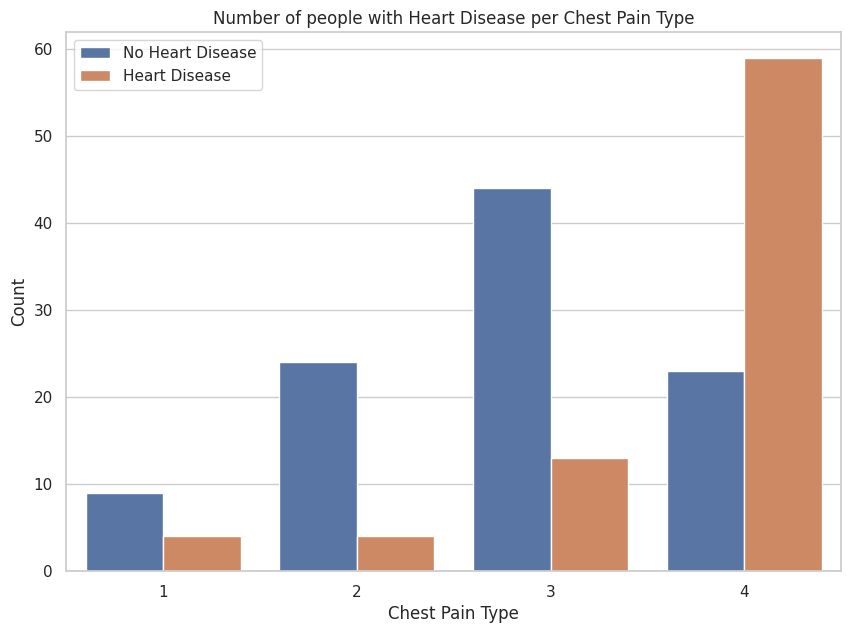

In [ ]:
#bar plot displaying the counts for each chest pain type grouped by whther they had heart disease
fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x = data.chest_pain_type, hue = data.heart_disease_present)
plt.title("Number of people with Heart Disease per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
ax.legend(labels = ["No Heart Disease", "Heart Disease"])
plt.show()

**Presença de Doença Cardíaca vs Angina induzida por exercício**

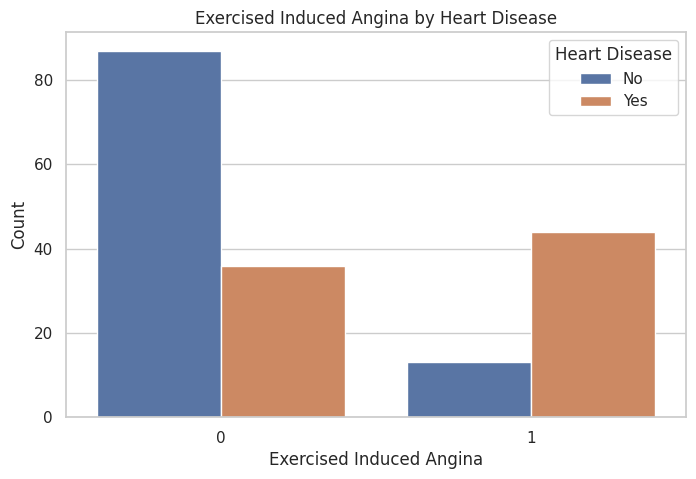

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = data.exercise_induced_angina, hue = data.heart_disease_present)
plt.title("Exercised Induced Angina by Heart Disease")
plt.xlabel("Exercised Induced Angina")
plt.ylabel("Count")
plt.legend(title = "Heart Disease", labels = ["No", "Yes"])
plt.show()


**Presença de Doença Cardíaca VS Old peak ST depression**

<ipython-input-50-0c68c1dbe8ec>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.oldpeak_eq_st_depression[data.heart_disease_present == 0], shade = True)
<ipython-input-50-0c68c1dbe8ec>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.oldpeak_eq_st_depression[data.heart_disease_present == 1], shade = True, color = "r")


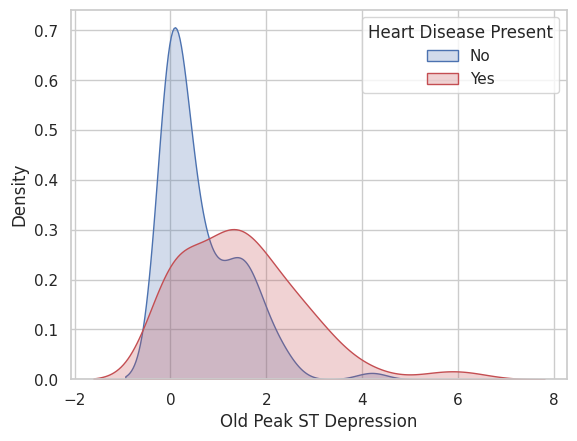

In [ ]:
#sns.boxenplot(data.heart_disease_present, data.oldpeak_eq_st_depression)
#plt.xlabel("Heart Disease Presence")
#plt.ylabel("Old Peak ST Depression")
#plt.show()

sns.kdeplot(data.oldpeak_eq_st_depression[data.heart_disease_present == 0], shade = True)
sns.kdeplot(data.oldpeak_eq_st_depression[data.heart_disease_present == 1], shade = True, color = "r")
plt.xlabel("Old Peak ST Depression")
plt.legend(title = "Heart Disease Present", labels = ["No", "Yes"])
plt.show();

**Presença de Doença Cardíaca VS Pressão Sanguínea em Repouso**

<ipython-input-51-c9ed3d886c22>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.resting_blood_pressure[data.heart_disease_present == 0], shade = True)
<ipython-input-51-c9ed3d886c22>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.resting_blood_pressure[data.heart_disease_present == 1], shade = True, color = "r")


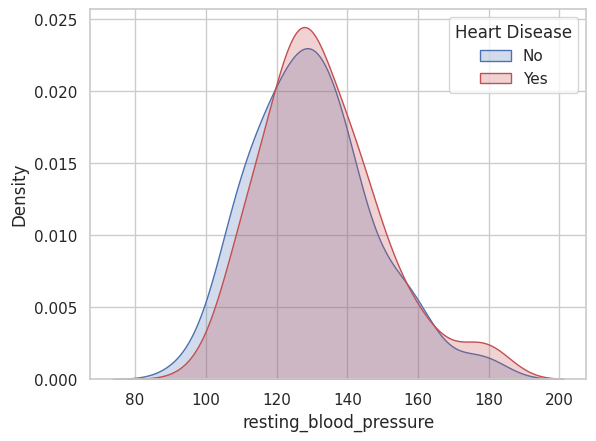

In [ ]:
sns.kdeplot(data.resting_blood_pressure[data.heart_disease_present == 0], shade = True)
sns.kdeplot(data.resting_blood_pressure[data.heart_disease_present == 1], shade = True, color = "r")
plt.legend(title = "Heart Disease", labels = ["No", "Yes"])
plt.show()



**Presença de Doença Cardíaca VS Thal**

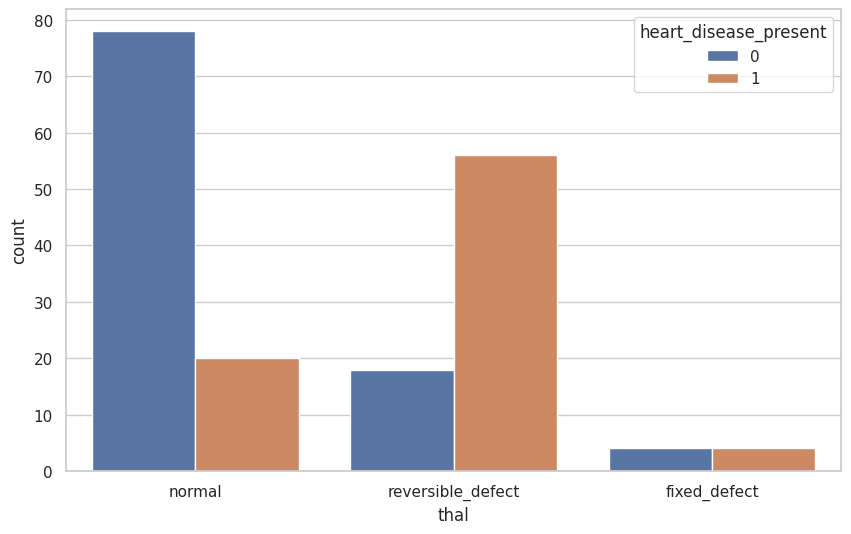

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', hue='heart_disease_present', data=data);


**Presença de Doença Cardíaca VS Número das maiores Veias Sanguíneas**

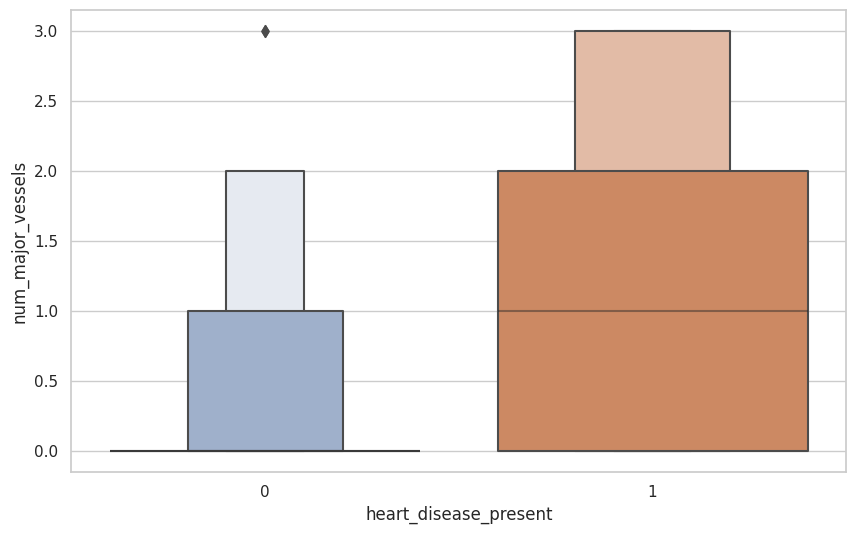

<ipython-input-53-10cb2dcb0352>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='num_major_vessels', hue='heart_disease_present', shade=True)


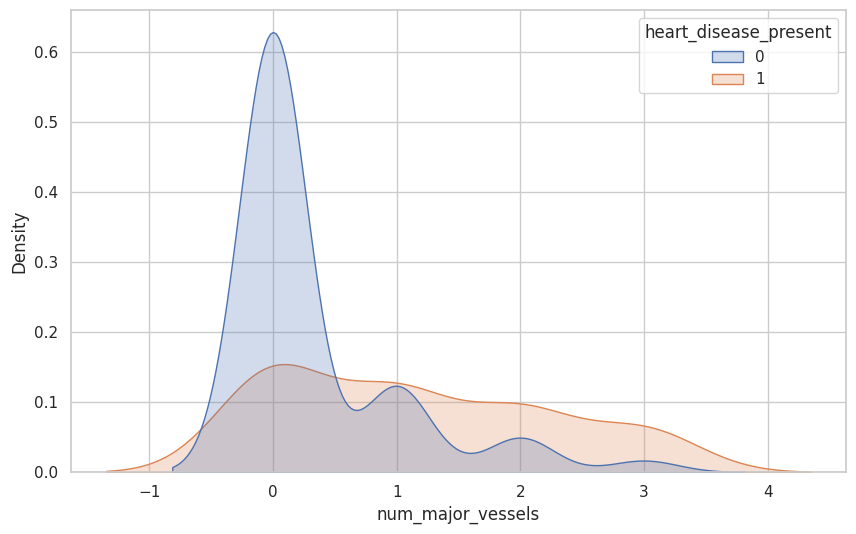

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='heart_disease_present', y='num_major_vessels', data=data)
plt.show()

# KDE plots for each class
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='num_major_vessels', hue='heart_disease_present', shade=True)
plt.show()


**Presença de Doença Cardíaca VS slope_of_peak_exercise_st_segment**

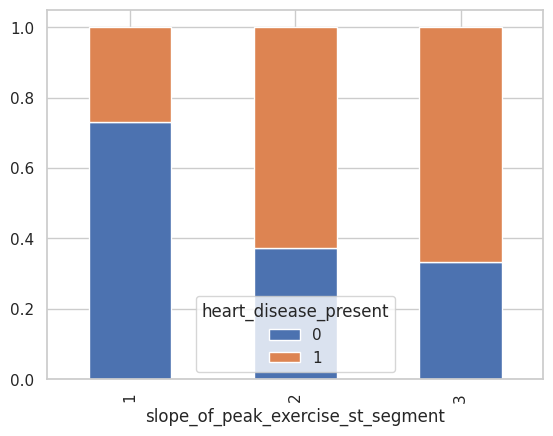

In [ ]:
table = pd.crosstab(data.slope_of_peak_exercise_st_segment, data.heart_disease_present, normalize="index")
#table.plot(kind = "bar")
table.plot(kind = "bar", stacked = True);

**Presença de Doença Cardíaca VS fasting_blood_sugar_gt_120_mg_per_dl**

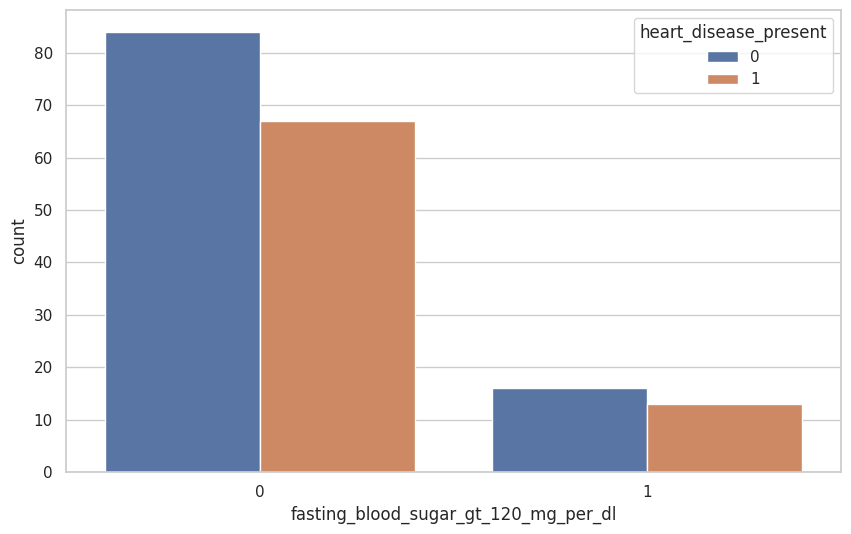

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl', hue='heart_disease_present', data=data)
plt.show()


**Presença de Doença Cardíaca VS resting_ekg_results**

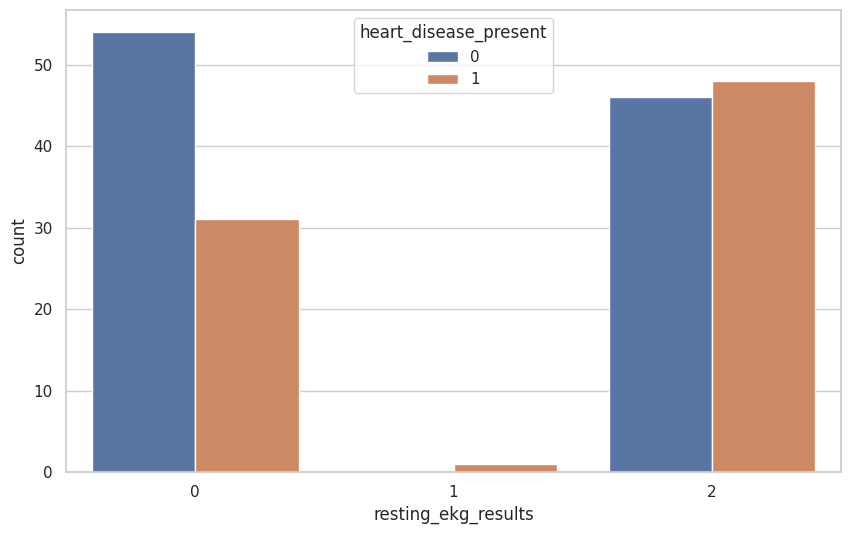

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='resting_ekg_results', hue='heart_disease_present', data=data)
plt.show()


**Presença de Doença Cardíaca VS serum_cholesterol_mg_per_dl**

<ipython-input-57-17f91950acc6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.serum_cholesterol_mg_per_dl[data.heart_disease_present == 0], shade = True);
<ipython-input-57-17f91950acc6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.serum_cholesterol_mg_per_dl[data.heart_disease_present == 1], shade = True);


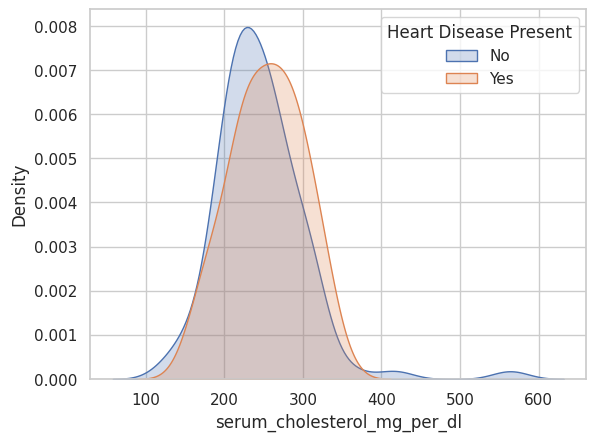

In [ ]:
sns.kdeplot(data.serum_cholesterol_mg_per_dl[data.heart_disease_present == 0], shade = True);
sns.kdeplot(data.serum_cholesterol_mg_per_dl[data.heart_disease_present == 1], shade = True);
plt.legend(title = "Heart Disease Present", labels = ["No", "Yes"]);


### **Divisão Train/Validation/Test Sets**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Project/heart.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42, stratify=y)

# Split Train into Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
X_train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.486957,131.382609,3.200000,0.739130,0.191304,0.956522,248.469565,0.986957,0.678261,54.834783,150.756522,0.321739
std,0.582873,16.159611,0.829288,0.991959,0.395049,1.003427,55.827793,1.145358,0.469188,9.686245,22.535972,0.469188
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,214.500000,0.000000,0.000000,48.000000,133.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,0.000000,244.000000,0.700000,1.000000,55.000000,154.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,274.000000,1.600000,1.000000,62.000000,168.500000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


### **Pré-Processamento**

In [ ]:
#dividir os dados nos diferentes tipos de variáveis: categóricas, numéricas e binárias para fazer as transformações mais indicadas a cada um de forma a prepara os dados para os modelos
categorical = ['thal', 'chest_pain_type', "slope_of_peak_exercise_st_segment"]
binary = list(['fasting_blood_sugar_gt_120_mg_per_dl', 'sex', 'exercise_induced_angina'])
numerical = list(set(X_train.columns.tolist()) - set(categorical) - set(binary))

X_train_cat = X_train[categorical]
X_train_bin = X_train[binary]
X_train_num = X_train[numerical]


In [ ]:
data_pipe = ColumnTransformer([
    ("numerical", StandardScaler(), numerical), #escala
    ("categorical", OneHotEncoder(), categorical)
], remainder = 'passthrough') #binárias


In [ ]:
#transformações nos dados de treino
X_temp = data_pipe.fit_transform(X_train) # calcula a média e o desvio padrão das features
X_temp = pd.DataFrame(X_temp)

#adiciona de novo os nomes das variáveis e os seus indices
col_names = numerical + list(data_pipe.named_transformers_['categorical'].get_feature_names_out(categorical)) +  binary
X_temp.columns = col_names
X_temp.index = X_train.index

X_temp.head()
X_val_tr = data_pipe.fit_transform(X_val)

#aplica as mesmas transformações nos dados de teste para a avaliação dos modelos
X_test_tr = data_pipe.transform(X_test)


###**Model Training & Prediction**

**a) Machine Learning Tradicional**

1) Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy on Training data: 0.8695652173913043
Accuracy on Test data: 0.8611111111111112
Confusion Matrix
[[16  4]
 [ 1 15]]


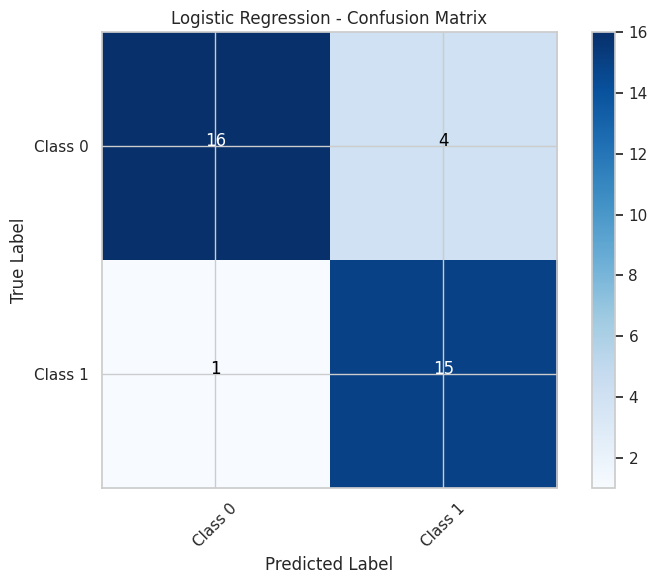

Cross-Validation Scores: [0.66666667 0.83333333 0.66666667 0.83333333 0.6       ]
Mean CV Accuracy: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = "Logistic Regression"
lr = LogisticRegression()

# Treino
lr.fit(X_temp, y_train)

# TRAINING DATA
train_predictions_lr = lr.predict(X_temp)
training_data_accuracy_lr = accuracy_score(train_predictions_lr, y_train)
print(f"Accuracy on Training data: {training_data_accuracy_lr}")

# TEST DATA
test_predictions_lr = lr.predict(X_test_tr)
test_data_accuracy_lr = accuracy_score(test_predictions_lr, y_test)
print(f"Accuracy on Test data: {test_data_accuracy_lr}")

# Confusion matrix
lr_conf_matrix = confusion_matrix(y_test, test_predictions_lr)
print("Confusion Matrix")
print(lr_conf_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(lr_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"{modelLR} - Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fmt = 'd'
thresh = lr_conf_matrix.max() / 2.
for i, j in itertools.product(range(lr_conf_matrix.shape[0]), range(lr_conf_matrix.shape[1])):
    plt.text(j, i, format(lr_conf_matrix[i, j], fmt), horizontalalignment="center", color="white" if lr_conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# 5 FOLD CROSS VALIDATION
cv_scores = cross_val_score(lr, X_val_tr, y_val, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

2) Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Accuracy on Training data: 0.7478260869565218
Accuracy on Test data: 0.8333333333333334
Confusion Matrix
[[17  3]
 [ 3 13]]


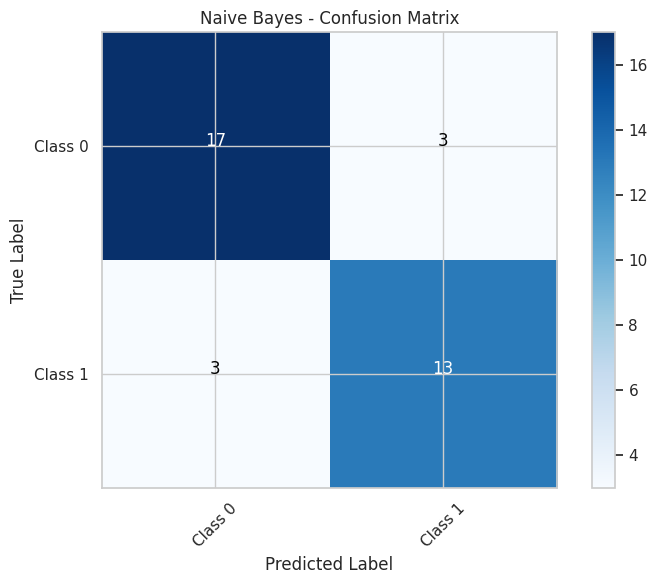

Cross-Validation Scores: [0.5        0.66666667 0.83333333 0.66666667 0.6       ]
Mean CV Accuracy: 0.6533333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import itertools

modelNB = "Naive Bayes"
nb = GaussianNB()

# Treino
nb.fit(X_temp, y_train)

# TRAINING DATA
train_predictions = nb.predict(X_temp)
training_data_accuracy = accuracy_score(train_predictions, y_train)
print(f"Accuracy on Training data: {training_data_accuracy}")

# TEST DATA
test_predictions = nb.predict(X_test_tr)
test_data_accurac_nb = accuracy_score(test_predictions, y_test)
print(f"Accuracy on Test data: {test_data_accurac_nb}")

# Confusion matrix
nb_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix")
print(nb_conf_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(nb_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"{modelNB} - Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fmt = 'd'
thresh = nb_conf_matrix.max() / 2.
for i, j in itertools.product(range(nb_conf_matrix.shape[0]), range(nb_conf_matrix.shape[1])):
    plt.text(j, i, format(nb_conf_matrix[i, j], fmt), horizontalalignment="center", color="white" if nb_conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# 5 FOLD CROSS VALIDATION
cv_scores = cross_val_score(nb, X_val_tr, y_val, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

3) K-Nearest Neighbour

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy on Training data: 0.8347826086956521
Accuracy on Test data: 0.8611111111111112
Confusion Matrix
[[17  3]
 [ 2 14]]


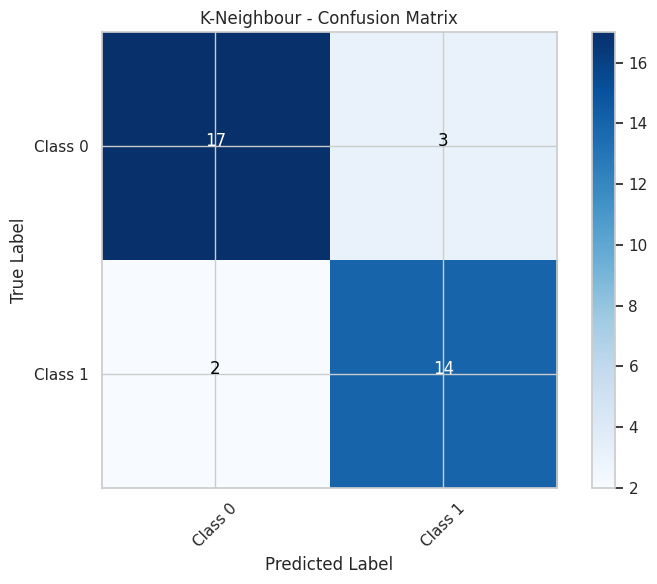

Cross-Validation Scores: [0.5        0.5        0.5        0.66666667 0.6       ]
Mean CV Accuracy: 0.5533333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import itertools

modelKNN = "K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto")

# Treino
knn.fit(X_temp, y_train)

# TRAINING DATA
train_predictions = knn.predict(X_temp)
training_data_accuracy = accuracy_score(train_predictions, y_train)
print(f"Accuracy on Training data: {training_data_accuracy}")

# TEST DATA
test_predictions = knn.predict(X_test_tr)
test_data_accuracy_knn = accuracy_score(test_predictions, y_test)
print(f"Accuracy on Test data: {test_data_accuracy_knn}")

# Confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix")
print(knn_confusion_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"{modelKNN} - Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fmt = 'd'
thresh = knn_confusion_matrix.max() / 2.
for i, j in itertools.product(range(knn_confusion_matrix.shape[0]), range(knn_confusion_matrix.shape[1])):
    plt.text(j, i, format(knn_confusion_matrix[i, j], fmt), horizontalalignment="center", color="white" if knn_confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# 5 FOLD CROSS VALIDATION
cv_scores = cross_val_score(knn, X_val_tr, y_val, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")


**b) Deep Learning**

Epoch 1/50
4/4 [==============================] - 3s 146ms/step - loss: 0.6689 - accuracy: 0.5913 - val_loss: 0.6420 - val_accuracy: 0.6207
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.5996 - accuracy: 0.7304 - val_loss: 0.6092 - val_accuracy: 0.6552
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 0.5625 - accuracy: 0.8348 - val_loss: 0.5802 - val_accuracy: 0.6897
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 0.5143 - accuracy: 0.8435 - val_loss: 0.5602 - val_accuracy: 0.6897
Epoch 5/50
4/4 [==============================] - 0s 32ms/step - loss: 0.4839 - accuracy: 0.8522 - val_loss: 0.5438 - val_accuracy: 0.6897
Epoch 6/50
4/4 [==============================] - 0s 53ms/step - loss: 0.4290 - accuracy: 0.8435 - val_loss: 0.5364 - val_accuracy: 0.6897
Epoch 7/50
4/4 [==============================] - 0s 35ms/step - loss: 0.3994 - accuracy: 0.8522 - val_loss: 0.5255 - val_accuracy: 0.6897
Epoch 8/50
4/4 [==========

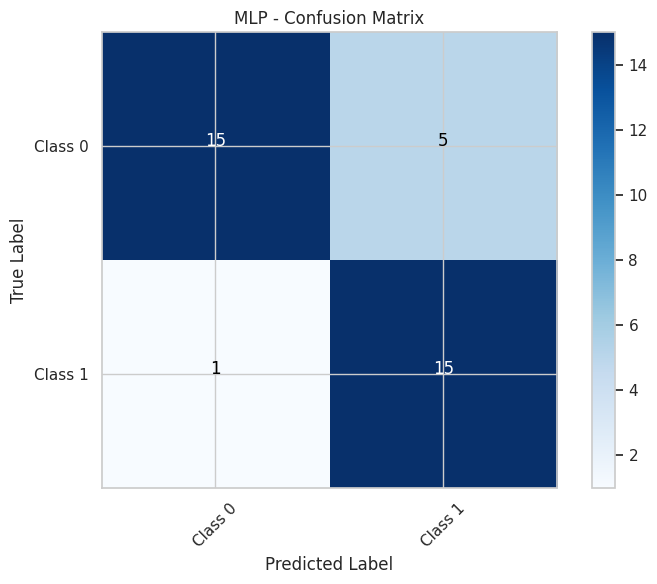

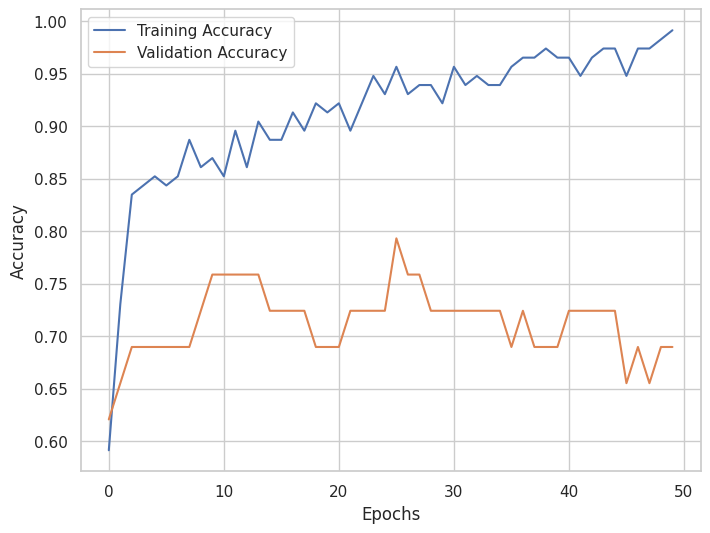

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelo MLP
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_temp.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#treino
history = model.fit(X_temp, y_train, epochs=50, batch_size=32, validation_data=(X_val_tr, y_val))

test_loss, test_accuracy_mlp = model.evaluate(X_test_tr, y_test)
print(f"Test Accuracy: {test_accuracy_mlp}")

training_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {training_accuracy}")

#previsao
y_pred = model.predict(X_test_tr)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("MLP - Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Adicionando a accuracy do treino
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 69ms/step
Cross-Validation Scores: [0.7391304347826086, 0.7391304347826086, 0.782608695652174, 0.7391304347826086, 0.7391304347826086]
Mean CV Accuracy: 0.7478260869565216


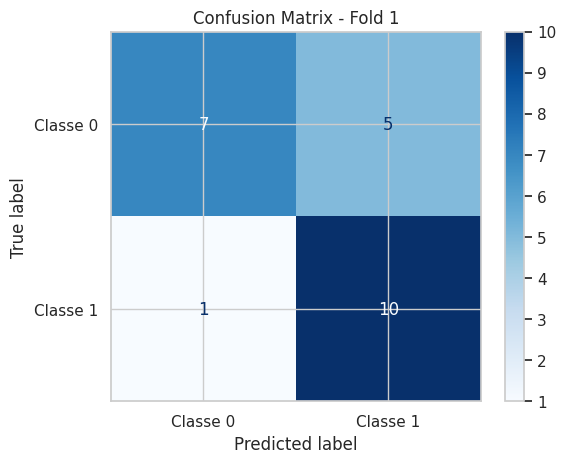

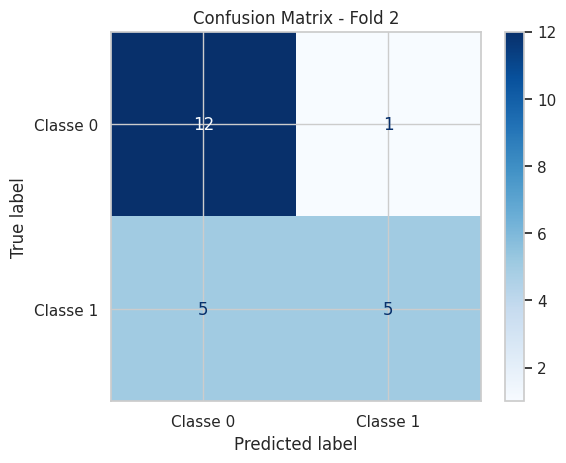

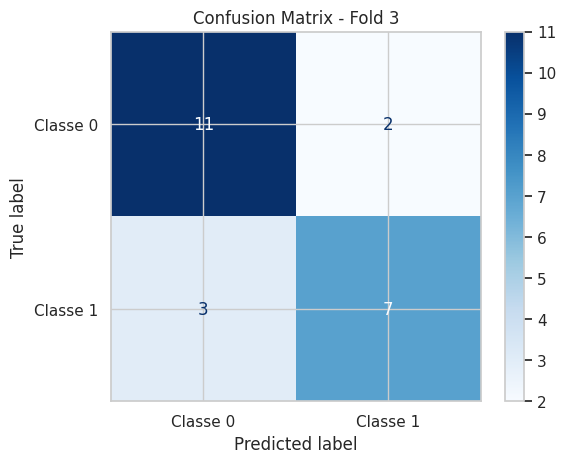

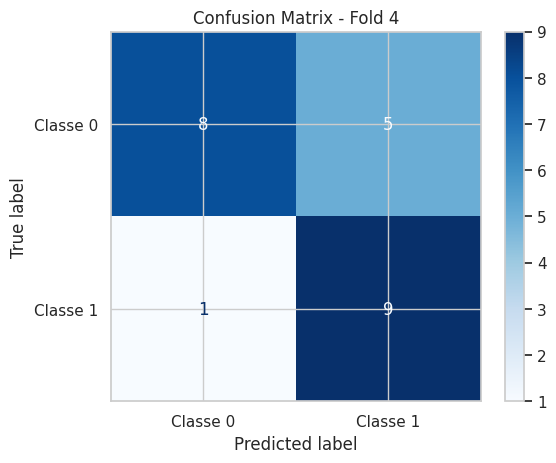

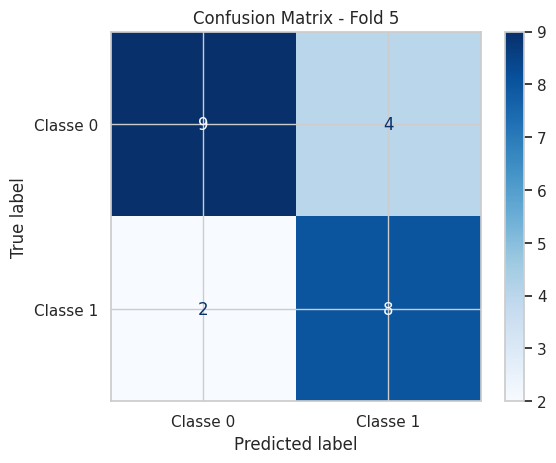

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

cv_scores = []
conf_matrices = []

# Cross fold validation
for train_index, test_index in skf.split(X_temp, y_train):
    X_train_fold, X_test_fold = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modelo
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_temp.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    #TRAINING
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    #PREDICTION
    y_pred_prob = model.predict(X_test_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)

    #EVALUATION
    accuracy = accuracy_score(y_test_fold, y_pred)
    cv_scores.append(accuracy)

    #CONFUSION MATRIX
    cm = confusion_matrix(y_test_fold, y_pred)
    conf_matrices.append(cm)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

for i, cm in enumerate(conf_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/50
4/4 [==============================] - 4s 161ms/step - loss: 0.6834 - accuracy: 0.6261 - val_loss: 0.6251 - val_accuracy: 0.7241
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - loss: 0.6058 - accuracy: 0.7652 - val_loss: 0.5909 - val_accuracy: 0.8621
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5397 - accuracy: 0.8174 - val_loss: 0.5510 - val_accuracy: 0.6552
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 0.4827 - accuracy: 0.8174 - val_loss: 0.5049 - val_accuracy: 0.7241
Epoch 5/50
4/4 [==============================] - 0s 37ms/step - loss: 0.4542 - accuracy: 0.8174 - val_loss: 0.4609 - val_accuracy: 0.8276
Epoch 6/50
4/4 [==============================] - 0s 23ms/step - loss: 0.4152 - accuracy: 0.8087 - val_loss: 0.4422 - val_accuracy: 0.8621
Epoch 7/50
4/4 [==============================] - 0s 27ms/step - loss: 0.3874 - accuracy: 0.8435 - val_loss: 0.4202 - val_accuracy: 0.8276
Epoch 8/50
4/4 [==========

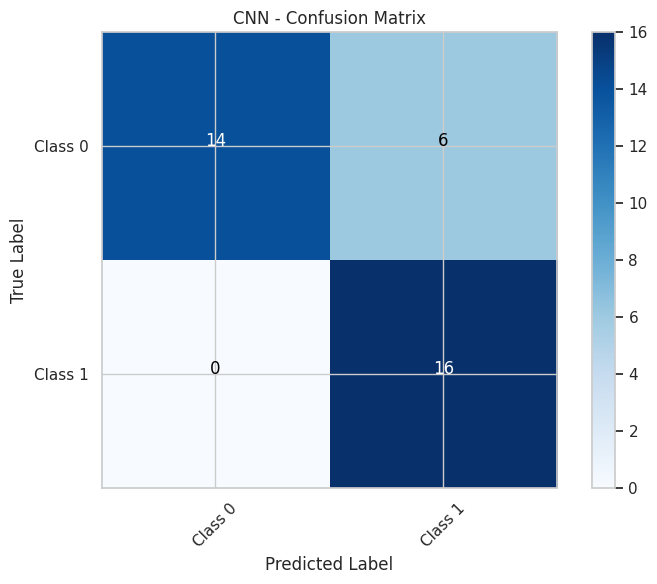

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_temp)
X_val_scaled = scaler.transform(X_val_tr)
X_test_scaled = scaler.transform(X_test_tr)

# Pré-processamento para CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Modelo CNN
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treino
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Avaliação
training_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {training_accuracy}")

test_loss, test_accuracy_cnn = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy_cnn}")

# Previsões
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("CNN - Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 219ms/step - loss: 1.0976 - accuracy: 0.6087
Cross-Validation Scores: [0.8260869383811951, 0.739130437374115, 0.782608687877655, 0.8260869383811951, 0.6086956262588501]
Mean CV Accuracy: 0.7565217256546021


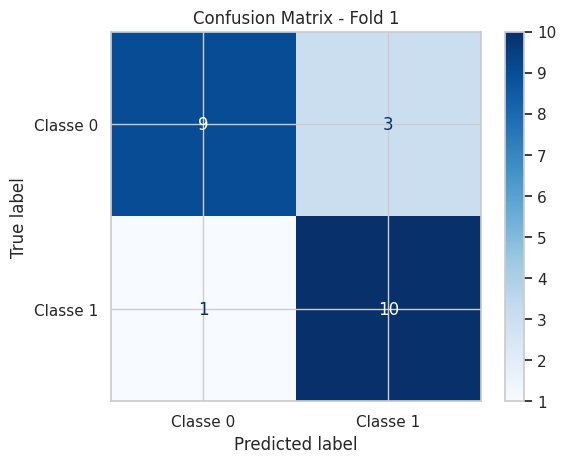

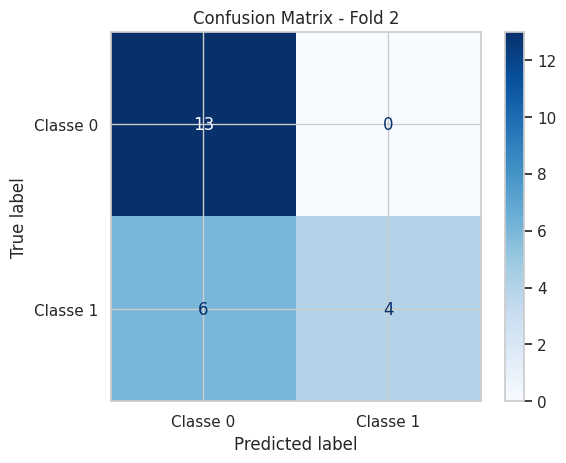

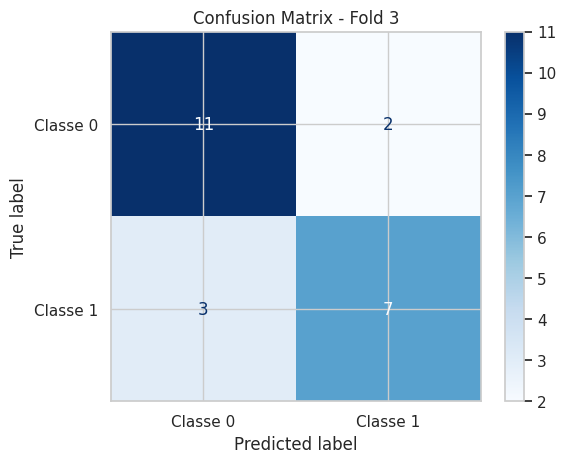

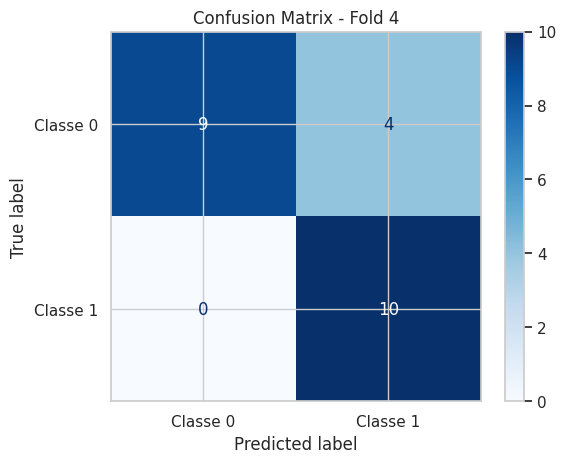

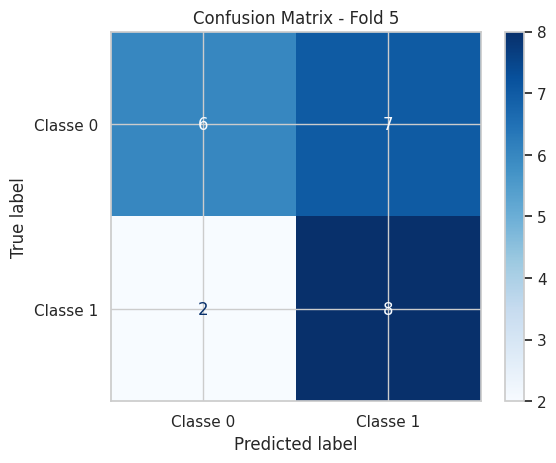

In [ ]:

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_temp)
X_val_scaled = scaler.transform(X_val_tr)
X_test_scaled = scaler.transform(X_test_tr)

# Pré-processamento
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)

cv_scores = []
conf_matrices = []

# Cross-validation
for train_index, test_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_test_fold = X_train_reshaped[train_index], X_train_reshaped[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modelo CNN
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # TRAINING
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    #EVALUATION
    y_pred = model.predict(X_test_fold)
    y_pred_classes = (y_pred > 0.5).astype(int)

    #CONFUSION MATRIX
    cm = confusion_matrix(y_test_fold, y_pred_classes)
    conf_matrices.append(cm)

    #EVALUATION/FOLD
    _, test_accuracy = model.evaluate(X_test_fold, y_test_fold)
    cv_scores.append(test_accuracy)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

for i, cm in enumerate(conf_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()


# **Resultados**

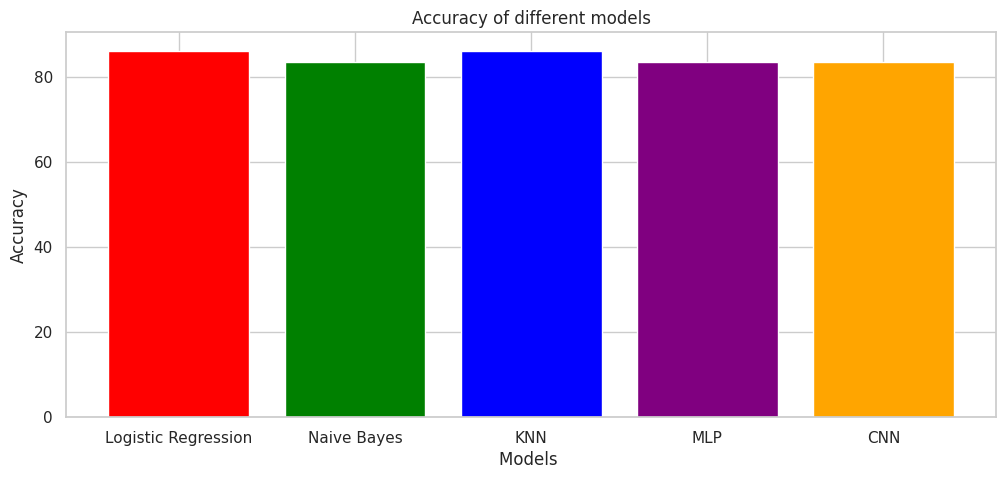

In [ ]:
results = {
    "Models": ["Logistic Regression", "Naive Bayes", "KNN", "MLP", "CNN"],
    "Accuracy": [test_data_accuracy_lr * 100, test_data_accurac_nb * 100, test_data_accuracy_knn * 100,
                 test_accuracy_mlp * 100, test_accuracy_cnn * 100]
}

result_df = pd.DataFrame(results)


colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.figure(figsize=(12, 5))
plt.title("Accuracy of different models")
plt.xlabel("Models ")
plt.ylabel("Accuracy")

plt.bar(result_df['Models'], result_df['Accuracy'], color=colors)

plt.show()